In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data

df = pd.read_excel('DATA_CBM_26_04_2022_rev02.xlsx',sheet_name = 'DATA_CBM_Lifetime Complete')
df.head()

,Lifetime,Broken,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z,Machine Name,Machine ID,Failure Model,Responsible Failure Cause
0,56,1,30.0,230.0,1.5,28.0,0.404,0.956,9.125,CNC Turning -1,20210045,Vibration Model,Y vibration is lower than Rated Y vibration
1,81,1,30.0,230.0,1.5,28.0,1.004,1.143,9.125,CNC Turning -2,20210046,Lifetime Model,Exceeded Motor Running Hours as respective Man...
2,60,0,30.0,230.0,1.5,34.0,0.469,1.290,9.121,CNC Turning -1,20210045,Healthy State,NaN
3,86,1,30.0,230.0,1.5,34.0,0.373,1.112,9.137,CNC Turning -2,20210046,Lifetime Model,Exceeded Motor Running Hours as respective Man...
4,30,0,30.0,230.0,1.5,31.0,0.461,1.282,9.121,CNC Turning -2,20210045,Healthy State,NaN


# Data Preparation

In [3]:
df.shape

(1255, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Lifetime                   1255 non-null   int64  
 1   Broken                     1255 non-null   int64  
 2   Temperature                1255 non-null   float64
 3   Voltage                    1255 non-null   float64
 4   Current                    1255 non-null   float64
 5   Humidity                   1255 non-null   float64
 6   Vibration - X              1255 non-null   float64
 7   Vibration  Y               1255 non-null   float64
 8   Vibration  Z               1255 non-null   float64
 9   Machine Name               1255 non-null   object 
 10  Machine ID                 1255 non-null   int64  
 11  Failure Model              1255 non-null   object 
 12  Responsible Failure Cause  777 non-null    object 
dtypes: float64(7), int64(3), object(3)
memory usage:

In [5]:
# Remove insignificant features machineID, Broken, Responsible Failure Cause from the data

df = df.drop(['Machine ID','Responsible Failure Cause','Broken'],axis=1)
df

,Lifetime,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z,Machine Name,Failure Model
0,56,30.0,230.0,1.5,28.0,0.404,0.956,9.125,CNC Turning -1,Vibration Model
1,81,30.0,230.0,1.5,28.0,1.004,1.143,9.125,CNC Turning -2,Lifetime Model
2,60,30.0,230.0,1.5,34.0,0.469,1.290,9.121,CNC Turning -1,Healthy State
3,86,30.0,230.0,1.5,34.0,0.373,1.112,9.137,CNC Turning -2,Lifetime Model
4,30,30.0,230.0,1.5,31.0,0.461,1.282,9.121,CNC Turning -2,Healthy State
...,...,...,...,...,...,...,...,...,...,...
1250,75,26.0,226.0,1.6,36.0,0.223,1.159,8.713,CNC Turning -1,Vibration Model
1251,21,26.0,226.0,1.0,30.0,0.080,1.178,9.148,CNC Turning -1,Vibration Model
1252,45,26.0,226.0,1.6,30.0,0.080,1.186,9.121,CNC Turning -1,Vibration Model
1253,74,26.0,226.0,1.0,30.0,0.212,1.355,9.125,CNC Turning -1,Healthy State


# Distribution of Variables


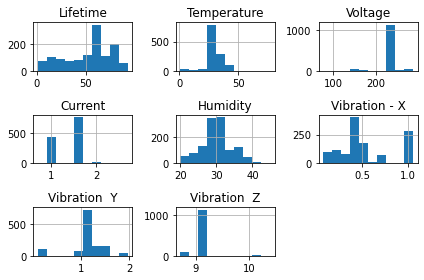

Skewness


Lifetime        -0.558462
Temperature     -0.472320
Voltage         -2.475948
Current         -0.225235
Humidity         0.242820
Vibration - X    0.590071
Vibration  Y    -1.343317
Vibration  Z     3.181236
dtype: float64

In [6]:
#Distribution of numeric independent variables

df.drop('Failure Model',axis=1).hist()
plt.tight_layout()
plt.show()
print('Skewness')
df.drop('Failure Model',axis=1).skew()

Interpretation: The above plot indicates that all features except{'Voltage' and 'Vibration Z'} are nearly normally distributed.

In [7]:
#Distribution of categorical Independent Variables

def cat_dist(data):
    col = ['Machine Name','Failure Model']
    for i in col:
        plt.subplot(2,2,1)
        sns.countplot(df[i])
        plt.title(f'Count Plot for {i}',fontsize=15)
        plt.xlabel(i,fontsize=12)
        plt.ylabel('Count',fontsize=18)
        plt.tight_layout()
        plt.show()

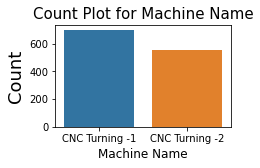

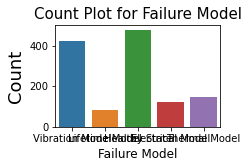

In [8]:
cat_dist(df)

#### Interpretation: 1) CNC Turning-1 is slightly more than CNC Turning-2 
####                 2) Helathy state presence is highest.
####                 3) Machine mostly broken by vibrational followed by Thermal and Electrical.

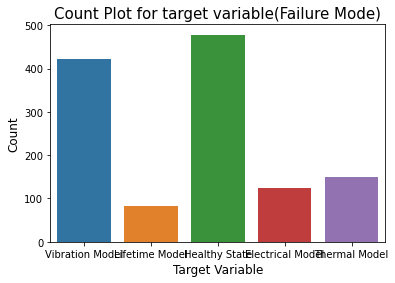

In [9]:
# Distribution of Dependent variable

df_target = df['Failure Model'].copy()
df_target.value_counts()

sns.countplot(x=df_target)

plt.title('Count Plot for target variable(Failure Mode)',fontsize=15)
plt.xlabel('Target Variable',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

In [10]:
# To find missing values

In [11]:
df.isnull().sum()

Lifetime         0
Temperature      0
Voltage          0
Current          0
Humidity         0
Vibration - X    0
Vibration  Y     0
Vibration  Z     0
Machine Name     0
Failure Model    0
dtype: int64

In [12]:
df1 = df.select_dtypes(include=object)
df1.columns

Index(['Machine Name', 'Failure Model'], dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
LE = LabelEncoder()

In [15]:
df1['Machine Name'] = LE.fit_transform(df1['Machine Name'])

In [16]:
df1['Failure Model'] = LE.fit_transform(df1['Failure Model'])

In [17]:
df1.head()

,Machine Name,Failure Model
0,0,4
1,1,2
2,0,1
3,1,2
4,1,1


In [18]:
df = df.drop(['Machine Name','Failure Model'],axis=1)

In [19]:
df_data= pd.concat([df,df1],1)
df_data

,Lifetime,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z,Machine Name,Failure Model
0,56,30.0,230.0,1.5,28.0,0.404,0.956,9.125,0,4
1,81,30.0,230.0,1.5,28.0,1.004,1.143,9.125,1,2
2,60,30.0,230.0,1.5,34.0,0.469,1.290,9.121,0,1
3,86,30.0,230.0,1.5,34.0,0.373,1.112,9.137,1,2
4,30,30.0,230.0,1.5,31.0,0.461,1.282,9.121,1,1
...,...,...,...,...,...,...,...,...,...,...
1250,75,26.0,226.0,1.6,36.0,0.223,1.159,8.713,0,4
1251,21,26.0,226.0,1.0,30.0,0.080,1.178,9.148,0,4
1252,45,26.0,226.0,1.6,30.0,0.080,1.186,9.121,0,4
1253,74,26.0,226.0,1.0,30.0,0.212,1.355,9.125,0,1


# Scale the Data

In [20]:
#Scale the variables to get all variables in same range

from sklearn.preprocessing import StandardScaler


In [21]:
df

,Lifetime,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z
0,56,30.0,230.0,1.5,28.0,0.404,0.956,9.125
1,81,30.0,230.0,1.5,28.0,1.004,1.143,9.125
2,60,30.0,230.0,1.5,34.0,0.469,1.290,9.121
3,86,30.0,230.0,1.5,34.0,0.373,1.112,9.137
4,30,30.0,230.0,1.5,31.0,0.461,1.282,9.121
...,...,...,...,...,...,...,...,...
1250,75,26.0,226.0,1.6,36.0,0.223,1.159,8.713
1251,21,26.0,226.0,1.0,30.0,0.080,1.178,9.148
1252,45,26.0,226.0,1.6,30.0,0.080,1.186,9.121
1253,74,26.0,226.0,1.0,30.0,0.212,1.355,9.125


In [22]:
X_scaler = StandardScaler()

num_scaled = X_scaler.fit_transform(df)
df1_num_scaled = pd.DataFrame(num_scaled,columns=df.columns)

In [23]:
#final data
data = pd.concat([df1_num_scaled,df1],axis=1)
data.head(20)

,Lifetime,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z,Machine Name,Failure Model
0,0.125835,0.059300,0.130816,0.408667,-0.470537,-0.418374,-0.485081,-0.012624,0,4
1,1.167269,0.059300,0.130816,0.408667,-0.470537,1.672329,0.022559,-0.012624,1,2
2,0.292464,0.059300,0.130816,0.408667,0.989951,-0.191881,0.421612,-0.033671,0,1
3,1.375555,0.059300,0.130816,0.408667,0.989951,-0.526393,-0.061596,0.050516,1,2
4,-0.957256,0.059300,0.130816,0.408667,0.259707,-0.219757,0.399895,-0.033671,1,1
5,0.625723,0.059300,0.130816,0.408667,-0.470537,-0.526393,0.598064,-2.201484,0,4
6,-1.248857,-0.078319,0.077486,0.743443,-0.470537,-0.191881,1.811513,0.071563,0,4
7,1.167269,-0.078319,0.077486,0.743443,-0.227122,-0.526393,0.065993,-0.012624,1,2
8,-0.623997,-0.078319,0.077486,0.743443,-0.470537,-0.390498,0.294024,0.029470,0,1
9,-0.998913,-0.078319,0.077486,0.743443,-0.470537,-0.655320,-0.612669,0.108395,1,4


In [24]:
# Divide the data into train and test

from sklearn.model_selection import train_test_split

In [25]:
X= data.drop('Failure Model',1)
y= data['Failure Model']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=123)

print('X train',X_train.shape)
print('y train',y_train.shape)
print('X test',X_test.shape)
print('y test',y_test.shape)

X train (878, 9)
y train (878,)
X test (377, 9)
y test (377,)


# Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
decision_tree_classification = DecisionTreeClassifier(criterion='entropy',random_state=10)

In [29]:
decision_tree = decision_tree_classification.fit(X_train,y_train)

In [30]:
dtree_pred= decision_tree.predict(X_test)

In [48]:
X_test.head()

,Lifetime,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z,Machine Name
678,0.375779,-3.931660,-0.029174,0.743443,0.746536,1.700205,-0.083313,-0.012624,1
933,-0.332396,-0.491177,-0.082504,0.743443,0.016292,-0.153551,1.225148,-0.033671,0
873,-1.457144,-0.078319,0.077486,0.408667,-0.470537,-0.268540,1.811513,0.029470,0
524,0.459094,0.196920,0.184146,0.743443,-0.713952,-0.205819,0.399895,-2.096250,0
825,-2.165319,0.196920,0.184146,-1.265213,-0.227122,-0.526393,0.065993,0.150488,1


In [31]:
dtree_pred

array([3, 1, 4, 4, 1, 1, 1, 1, 4, 4, 1, 1, 3, 1, 1, 1, 0, 4, 4, 1, 1, 1,
       4, 4, 1, 0, 0, 4, 2, 1, 4, 1, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 4, 2, 4, 0, 1, 2, 1, 0, 1, 1, 4, 1, 1, 1, 4, 3, 2, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 3, 0, 4, 1, 2, 1, 1, 2, 3, 1, 2,
       4, 1, 1, 4, 3, 1, 0, 0, 1, 1, 1, 2, 3, 0, 0, 4, 0, 3, 1, 4, 1, 0,
       4, 3, 1, 1, 3, 1, 0, 0, 4, 2, 2, 1, 3, 4, 4, 4, 3, 1, 4, 4, 1, 0,
       1, 1, 4, 4, 1, 2, 2, 3, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 2, 3, 3, 4,
       1, 1, 1, 1, 1, 4, 1, 2, 4, 4, 4, 1, 1, 4, 4, 4, 1, 2, 2, 1, 0, 4,
       1, 1, 0, 1, 4, 0, 1, 3, 1, 1, 3, 4, 4, 4, 0, 4, 1, 0, 1, 4, 4, 0,
       4, 2, 1, 4, 1, 1, 1, 1, 4, 4, 3, 3, 1, 4, 0, 4, 2, 4, 4, 3, 1, 1,
       1, 4, 3, 2, 4, 1, 1, 4, 4, 3, 1, 0, 1, 1, 1, 4, 3, 4, 4, 1, 0, 1,
       0, 1, 1, 4, 4, 1, 1, 4, 4, 3, 4, 4, 4, 3, 4, 1, 4, 1, 3, 0, 3, 1,
       1, 1, 2, 1, 4, 1, 1, 4, 1, 3, 4, 1, 1, 4, 0, 4, 4, 4, 1, 4, 0, 1,
       3, 4, 4, 3, 4, 3, 4, 4, 2, 1, 4, 1, 4, 3, 1,

In [32]:
# check important Features 

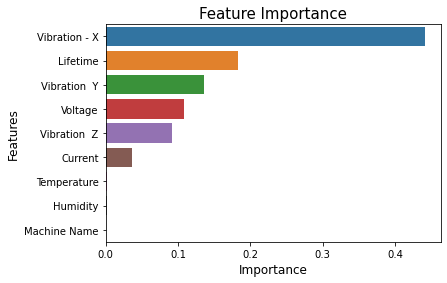

In [33]:
important_features = pd.DataFrame({'Features':X_train.columns,
                                  'Importance':decision_tree.feature_importances_})
important_features = important_features.sort_values('Importance',ascending=False)

sns.barplot(x='Importance',y='Features',data=important_features)
plt.title('Feature Importance',fontsize=15)
plt.xlabel('Importance',fontsize=12)
plt.ylabel('Features',fontsize=12)
plt.show()

# calculate the metrics for train and test set


In [34]:
pred_train = decision_tree.predict(X_train)

In [35]:
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score

In [36]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00       326
           2       1.00      1.00      1.00        58
           3       1.00      1.00      1.00       106
           4       1.00      1.00      1.00       300

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878



In [37]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00       152
           2       1.00      1.00      1.00        25
           3       0.95      0.95      0.95        43
           4       0.98      0.98      0.98       121

    accuracy                           0.99       377
   macro avg       0.99      0.99      0.99       377
weighted avg       0.99      0.99      0.99       377



In [38]:
cm = confusion_matrix(y_test, dtree_pred)
cm

array([[ 36,   0,   0,   0,   0],
       [  0, 152,   0,   0,   0],
       [  0,   0,  25,   0,   0],
       [  0,   0,   0,  41,   2],
       [  0,   0,   0,   2, 119]], dtype=int64)

In [39]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, dtree_pred)))


Accuracy: 0.99



In [40]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_train, pred_train)))


Accuracy: 1.00



In [41]:
#df1['Failure Model'].value_counts()

In [42]:
#df_target.value_counts()

In [43]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Electrical Model','Healthy State','Lifetime Model','Thermal Model','Vibration Model'], 
                     columns = ['Electrical Model','Healthy State','Lifetime Model','Thermal Model','Vibration Model'])

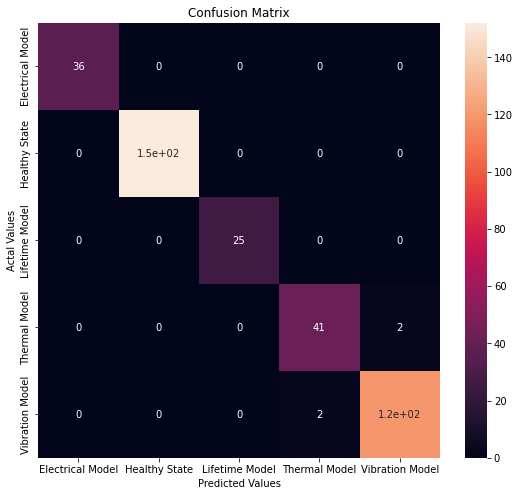

In [44]:
#Plotting the confusion matrix
plt.figure(figsize=(9,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [45]:
y_test_proba= decision_tree.predict_proba(X_test)

In [46]:
y_test_proba

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [47]:
# find Roc-Auc score

roc_auc_score(y_test,y_test_proba, multi_class='ovr')

0.9923158922521094